In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('owid-covid-data.xlsx', usecols='C:E')
df.rename(columns={'location':'국가','date':'일자', 'total_cases':'확진자'}, inplace=True)
df = df.fillna(0)
df['일자'] = pd.to_datetime(df['일자'])
df['일자'] = df['일자'].dt.strftime('%y.%m.%d')
df = df[df['일자'] == '22.07.04']
df['확진자'] = df['확진자'].astype(int)
df

,국가,일자,확진자
861,Afghanistan,22.07.04,182793
1734,Africa,22.07.04,12081451
2595,Albania,22.07.04,282690
3456,Algeria,22.07.04,266173
4311,Andorra,22.07.04,44177
...,...,...,...
195457,Wallis and Futuna,22.07.04,454
196353,World,22.07.04,550045521
197169,Yemen,22.07.04,11832
198008,Zambia,22.07.04,326259


In [3]:
continents = ['Africa', 'Asia', 'Europe', 'European Union', 'High income', 'Upper middle income', 'Low income', 
              'Lower middle income', 'North America', 'South Africa', 'South America', 'World']
filt = df['국가'].isin(continents)
df = df[~filt]
df

,국가,일자,확진자
861,Afghanistan,22.07.04,182793
2595,Albania,22.07.04,282690
3456,Algeria,22.07.04,266173
4311,Andorra,22.07.04,44177
5148,Angola,22.07.04,101320
...,...,...,...
194833,Vietnam,22.07.04,10749324
195457,Wallis and Futuna,22.07.04,454
197169,Yemen,22.07.04,11832
198008,Zambia,22.07.04,326259


In [4]:
df = df.sort_values(by=['확진자'], ascending=0)
df_top = df.head(10)
df_top

,국가,일자,확진자
188244,United States,22.07.04,87886589
83002,India,22.07.04,43531650
25672,Brazil,22.07.04,32535923
63680,France,22.07.04,31512793
67957,Germany,22.07.04,28542484
187349,United Kingdom,22.07.04,22822055
89911,Italy,22.07.04,18805756
167241,South Korea,22.07.04,18413997
148728,Russia,22.07.04,18173480
182340,Turkey,22.07.04,15180444


In [5]:
df_etc = df.iloc[10:]
df_etc

,국가,일자,확진자
168947,Spain,22.07.04,12818184
194833,Vietnam,22.07.04,10749324
136326,Oceania,22.07.04,9989260
91652,Japan,22.07.04,9405007
7737,Argentina,22.07.04,9394326
...,...,...,...
116876,Micronesia (country),22.07.04,38
193096,Vatican,22.07.04,29
113748,Marshall Islands,22.07.04,18
150237,Saint Helena,22.07.04,4


In [6]:
df_top.set_index('국가', inplace=True)

In [7]:
df_top.loc['ETC'] = ['22.07.04', df_etc['확진자'].sum()]

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [8]:
df_top

,일자,확진자
국가,,
United States,22.07.04,87886589
India,22.07.04,43531650
Brazil,22.07.04,32535923
France,22.07.04,31512793
Germany,22.07.04,28542484
United Kingdom,22.07.04,22822055
Italy,22.07.04,18805756
South Korea,22.07.04,18413997
Russia,22.07.04,18173480


In [9]:
df_top.reset_index(inplace=True)
df_top

,국가,일자,확진자
0,United States,22.07.04,87886589
1,India,22.07.04,43531650
2,Brazil,22.07.04,32535923
3,France,22.07.04,31512793
4,Germany,22.07.04,28542484
5,United Kingdom,22.07.04,22822055
6,Italy,22.07.04,18805756
7,South Korea,22.07.04,18413997
8,Russia,22.07.04,18173480
9,Turkey,22.07.04,15180444


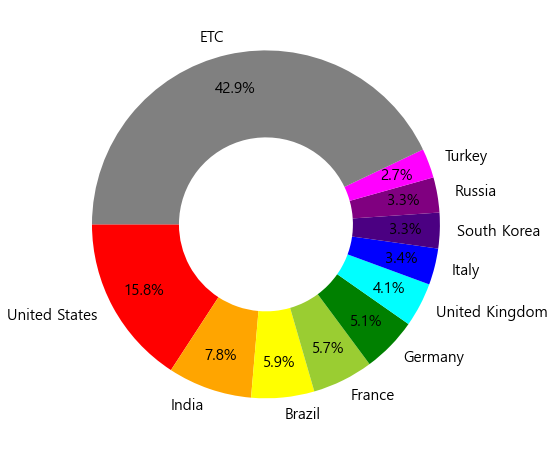

In [10]:
fig = plt.figure(figsize=(8,8))
values = df_top['확진자'].tolist()
labels = df_top['국가'].tolist()
colors = ['#ff0000', '#ffa500', '#ffff00', '#9acd32', '#008000',
          '#00ffff', '#0000ff', '#4b0082', '#800080', '#ff00ff', '#808080']
plt.pie(values, labels=labels, wedgeprops=dict(width=0.5),
        autopct = '%.1f%%', startangle=180, colors=colors, pctdistance = 0.8)
plt.show()